## Problem :- Marks 200. Predicting Shopping Mall Sales. You will have to create model to predict revenue. Identify the model with best params. Target Column - Revenue. 

## Dataset link :-  https://github.com/edyoda/data-science-complete-tutorial/blob/master/Data/Shopping_Revenue.csv

In [67]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [68]:
# Import the dataset
data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/Shopping_Revenue.csv')
data.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,7/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,2/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,3/9/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,2/2/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,5/9/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715


In [69]:
data.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            4
P7            4
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [70]:
data.fillna(0, inplace = True)

In [71]:
data.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [72]:
# Now there is no null value

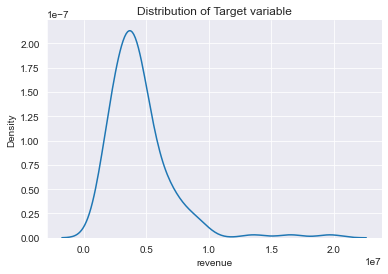

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.distplot(data['revenue'],hist=False)
plt.title('Distribution of Target variable')
sns.despine()

<AxesSubplot:xlabel='Type', ylabel='count'>

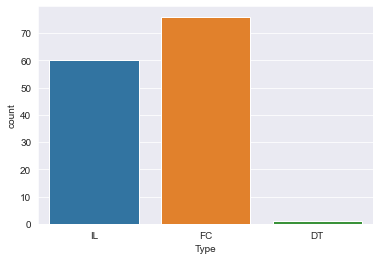

In [74]:
sns.set_style('darkgrid')
sns.countplot(data["Type"])

In [75]:
data['Open Date'] = pd.to_datetime(data['Open Date'])
data['launch_Month'] = [x.month for x in data['Open Date']]
data['launch_year'] = [x.year for x in data['Open Date']]
data.drop(['Id','Open Date'],axis=1,inplace=True)

Text(0.5, 1.0, 'Month-wise no of launches')

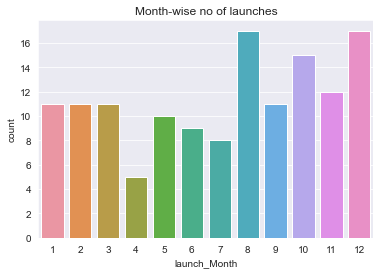

In [76]:
sns.countplot(data['launch_Month'])
plt.title('Month-wise no of launches')

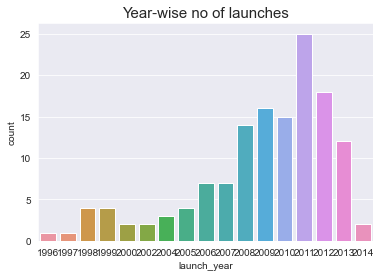

In [77]:
sns.countplot(data['launch_year'],order=[1996,1997,1998,1999,2000,2002,2004,2005,2006,
                                       2007,2008,2009,2010,2011,2012,2013,2014])
plt.title('Year-wise no of launches',fontsize=15);

In [78]:
# Increase the size of above one figure.
plt.rcParams['figure.figsize'] = (10,6)

In [79]:
# Preprocessing the data
data['Type'].value_counts()

FC    76
IL    60
DT     1
Name: Type, dtype: int64

In [80]:
data['City Group'].value_counts()

Big Cities    78
Other         59
Name: City Group, dtype: int64

In [81]:
data['City'].value_counts()

İstanbul          50
Ankara            19
İzmir              9
Bursa              5
Samsun             5
Antalya            4
Sakarya            4
Kayseri            3
Diyarbakır         3
Tekirdağ           3
Adana              3
Eskişehir          3
Trabzon            2
Muğla              2
Aydın              2
Konya              2
Kırklareli         1
Karabük            1
Gaziantep          1
Elazığ             1
Kocaeli            1
Denizli            1
Osmaniye           1
Isparta            1
Edirne             1
Kastamonu          1
Amasya             1
Bolu               1
Şanlıurfa          1
Afyonkarahisar     1
Tokat              1
Uşak               1
Balıkesir          1
Kütahya            1
Name: City, dtype: int64

In [82]:
len(data['City'].unique())

34

In [83]:
# Here we delete the City columns as it not contain not much information about countries.

In [84]:
data.drop('City',axis=1,inplace=True)

In [85]:
#converting other categorical columns
data['Type'] = data['Type'].map({'FC':0,'IL':1,'DT':2})

from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
data['City Group'] = encoder.fit_transform(np.array(data['City Group']).reshape(-1,1))
data['City Group'] = data['City Group'].apply(int)

In [86]:
# Fill a Mean value 
data.dropna().groupby('launch_Month')['revenue'].mean()

launch_Month
1     5.900851e+06
2     4.189109e+06
3     3.969557e+06
4     4.726097e+06
5     3.657800e+06
6     3.776214e+06
7     3.458596e+06
8     3.883020e+06
9     5.390856e+06
10    5.236838e+06
11    4.721400e+06
12    4.299763e+06
Name: revenue, dtype: float64

In [87]:
data.groupby('launch_year')['revenue'].mean()

launch_year
1996    3.903884e+06
1997    4.286645e+06
1998    4.251905e+06
1999    7.329030e+06
2000    1.359602e+07
2002    4.991022e+06
2004    3.482435e+06
2005    6.611118e+06
2006    4.203972e+06
2007    5.079333e+06
2008    4.876962e+06
2009    4.652457e+06
2010    4.383878e+06
2011    4.147879e+06
2012    3.837859e+06
2013    2.532287e+06
2014    2.464944e+06
Name: revenue, dtype: float64

In [95]:
# Split train and test dataset inot X and y
from sklearn.model_selection import train_test_split
X=data.drop('revenue',axis=1)
y=data['revenue']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=12345)

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

regressors = {
    'Linear Regression' : LinearRegression(),
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Support Vector Machines' : SVR(),
    'K-nearest Neighbors' : KNeighborsRegressor(),
    'XGBoost' : XGBRegressor()
}
result=pd.DataFrame(columns=['Mean Absolute Error','Mean Square Error','R2-score'])
for method,func in regressors.items():
    func.fit(X_train,y_train)
    pred = func.predict(X_test)
    result.loc[method]= [mean_absolute_error(y_test,pred),
                          mean_squared_error(y_test,pred),
                          r2_score(y_test,pred)
                         ]
result

,Mean Absolute Error,Mean Square Error,R2-score
Linear Regression,3.577424e+06,2.283791e+13,-0.585669
Logistic Regression,2.649389e+06,1.615216e+13,-0.121468
Decision Tree,2.011436e+06,1.132782e+13,0.213493
Random Forest,2.027157e+06,1.205490e+13,0.163011
Support Vector Machines,2.281838e+06,1.667312e+13,-0.157639
K-nearest Neighbors,2.195784e+06,1.553455e+13,-0.078586
XGBoost,1.964910e+06,1.151860e+13,0.200247


In [99]:
from sklearn.model_selection import GridSearchCV

param_grid = { "random_state": [0,1], 'bootstrap': [True,False], 'max_depth': [10], 'max_features': ['log2'], 'n_estimators': [5, 6, 7, 8, 9, 10]}

rfr = RandomForestRegressor()

grid_search = GridSearchCV(estimator=rfr, param_grid = param_grid,cv = 3, n_jobs = 1, verbose = 0, return_train_score=True) 

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.score(X_test, y_test))

{'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 10, 'random_state': 1}
0.12776632786635322


In [102]:
random = RandomForestRegressor(random_state=0, max_depth = 15, max_features = 'log2', n_estimators = 10, bootstrap =False)

random.fit(X_train,y_train)

y_pred_1 = random.predict(X_test) 
from sklearn import metrics 
print("Accuracy:",metrics.r2_score(y_test, y_pred_1))

Accuracy: 0.14427695148839825
